## Project Overview
This dataset contains the different features that have either a positive or negative infleunce to the sales price of the house.Data cleaning and Exploratory analysis will be performed on the dataset to see the relationship between the different features and the sales price.  
Also, the house sales price has different sales conditions and also different types of contract which must be signed between the buyer and the seller.

In [24]:
#importing packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,6)

In [25]:
#import the dataset
data = pd.read_csv('dataset.csv')
#shape gives the number of rows and columns the dataset has.
data.shape

(1460, 81)

In [26]:
#A view of the first 5 rows in the dataset.
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
#summary statistics for numerical data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
#CALCULATE NUMBER OF MISSING VALUES IN THE DATA
def check_null_values(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count())*100
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    

In [29]:

check_null_values(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Total,0,0,0,259,0,0,1369,0,0,0,...,0,1453,1179,1406,0,0,0,0,0,0
Percent,0,0,0,17.7397,0,0,93.7671,0,0,0,...,0,99.5205,80.7534,96.3014,0,0,0,0,0,0
Types,int64,int64,object,float64,int64,object,object,object,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64


### Analyzing the missing data from the table.  
The features with NA as values are: LotFrontage, Alley, PoolQC, Fence, MiscFeature and more that have been cut off the table. 
Going through the dataset, not all values with NA meant a null value except for the LotFrontage feature. 
Data cleaning will therfore be necessary only on the LotFrontage data field.  
#### Data cleaning of LotFrontage data field.
Since this field contains numerical data, all the missing values will be replaced with the mean of the datafield.

In [30]:
#Filling the NA values in LotFrontage with the mean value.
data['LotFrontage'] = data['LotFrontage'].fillna((data['LotFrontage'].mean()))

In [31]:
# verifying if there is still any null value in the LotFrontage column.
data['LotFrontage'].isnull().sum()

0

### Exploratory Data Analysis
Exploratory data analysis will be performed on the dataset to see the different relationship between some features like when the house was built, overall house condition and the price range most clients buy. Their infleunce will be visualized be it positively or negatively affecting the house sales price. Also visualizing the different means of payment prefered by most clients and the most often contract type signed by the grantor and the grantee.
#### Below are the different graphs to be considered:
    - Scatter plot of the clients ID and the Sales Price.
    - Bar chat of Overall House conditions vs the frequency count.
    - Scatter plot of Year Built and the Sales Price.
    - Bar chat of Sale Type and frequency count.
    - Bar chat of Sale Condition and frequency count.

Text(0.5,1,'Relationship between Customer and House Price \n')

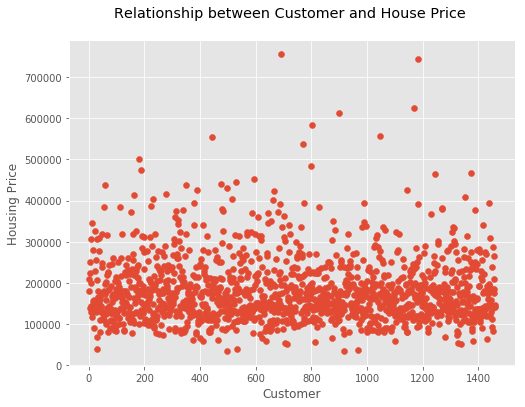

In [32]:
# Scatter plot showing the Sales Price 
plt.scatter(data.Id, data.SalePrice)
plt.xlabel("Customer")
plt.ylabel("Housing Price")
plt.title("Relationship between Customer and House Price \n")

> From the above scatter plot, Most of the clients go in for houses in the range of 100,000 - 300,000.
This visualization therefore shows the demand for houses within this range is high.
This therefore could be a very trivial piece of information to house estates companies which will better know how to best meet to the needs of their clients.

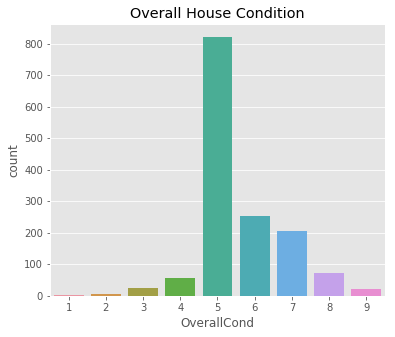

In [33]:
# House condition against frequency count.
plt.rcParams["figure.figsize"] = (6,5)
sns.countplot('OverallCond',data=data)
plt.title('Overall House Condition')
plt.show()

The above bar graph shows most clients go in for average condition houses.  
This means when the house condition is excellent or very poor, fewer or no clients go in for such.  
The average condition house is therefore the most in demand type of houses.  
This bar chat supports the above scatter plot which shows most clients go in for average condition house with prices in the range of 100,000 - 300,000.

Text(0.5,1,'Relationship between Year Built and House Price \n')

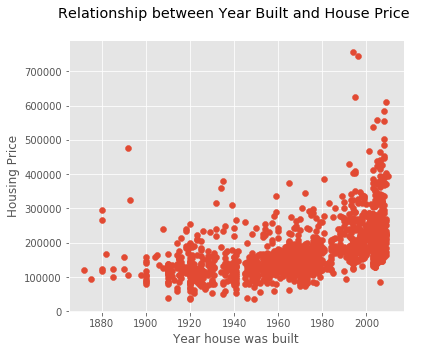

In [34]:
# Scatter plot Year Built against the House Price
plt.scatter(data.YearBuilt, data.SalePrice)
plt.xlabel("Year house was built")
plt.ylabel("Housing Price")
plt.title("Relationship between Year Built and House Price \n")

> From the above scatter plot, most clients demand for houses built from the 1920's to 2000's.  
This therefore shows that very old houses are hardly in demand especially houses built in the 1880's.  
Clients go in for new houses and still in the range 100.000 to 300,000.

Text(0.5,1,'Sale Type and Frequency Count \n')

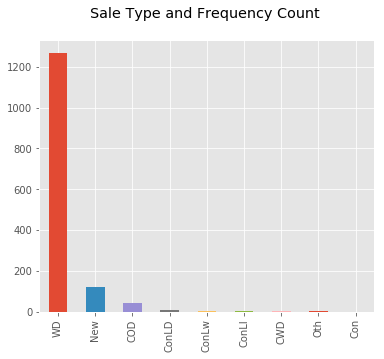

In [35]:
# A bar graph of SaleType and the corresponding frequency count.
data['SaleType'].value_counts().plot('bar')
plt.title('Sale Type and Frequency Count \n')

The above bar chat is a visualization of the different Sale Type and most of the clients go in for WD(Warranty Deed - Conventional).  
Most clients prefer this type of deed because if an issue arises regarding ownership, this deed is evidence that one party legally signed over ownership of the property to another.

Text(0.5,1,'Condition of Sale and Frequency Count \n')

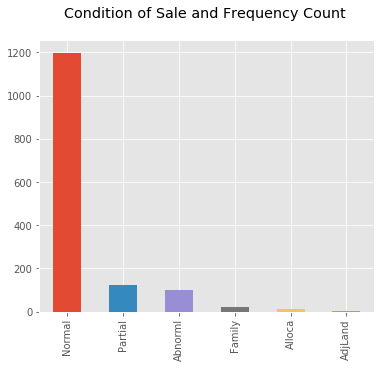

In [36]:
# Different Sale conditions considered when selling a house.
data['SaleCondition'].value_counts().plot('bar')
plt.title('Condition of Sale and Frequency Count \n')

The above bar chart shows the different Sale conditions and their corresponding frequencies.  
This visualization shows that most of the clients go in for the normal sale condition where all the money is paid at and the property ownership transfered at once.  
This is the best and most common option clients prefer to go in while the next closest group goes in for the partial condition where the home was not completed when last assessed (associated with New Homes). Partially completed buildings will be cheaper as work still has to be done for the house to be complete.

## Primary Task
#### Which single field in dataset best describes the Sales Price field.
The field __Condition of Sale__ best describes the sales price.
    - These different conditions best describes the sales price as they will have different price considerations unlike normal sales of complete buildings to strangers. For example adjoin, family and partial condition will have a higher chance of being offered in a cheaper price range.
    - For example the case of normal sales where most clients go in for, this is buying a completed house from an unfamiliar seller.
    - Another case is that of partial sales where the buyer buys an incomplete house and then completes it to his own taste and under his financing.
    - Also, adjoining land purchase is when a neighbor buys a house which is closest to them to extend the house boundary and family is when a house is bought by a family member which will most at times come with some little consideration unlike to a stranger.
    - These different cases therefore play a great role to the sales price as they also affect the price. But since most of the clients fall under normal sales, there is therefore little or no compromise in the prices.

### TASK TWO

### Further Exploratory analysis
To be able to choose a suitable regression model, more exploratory data anysis is needed
More scatter plots will be visualized so as to see the relationship between these main features and the target which is the sales price.  
The following relationships will further be considered: 
 * Scatter plot of sales price vs GrLivArea (Above grade (ground) living area square feet)
 * Scatter plot of sales price vs TotalBsmtSF (Total square feet of basement area)
 * Scatter plot of sales price vs 1stFlrSF ( First Floor square feet)
 * Scatter plot of sales price vs 2ndFlrSF (Second Floor square feet) 
 

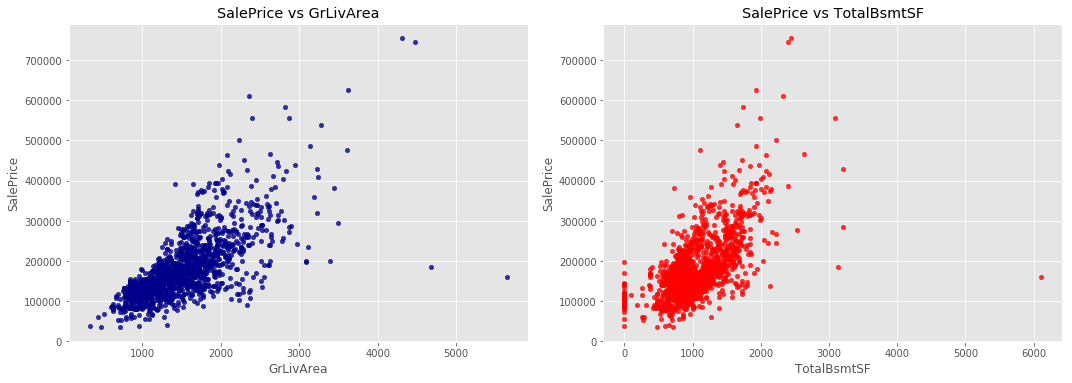

In [37]:
# Scatter plot showing the relationship between SalePrice and Above ground living area square feet (GrLivArea)
plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(221)
plt.style.use('ggplot')
plt.scatter(data['GrLivArea'], data['SalePrice'],c='#00008B', alpha = 0.8, s=20)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')

# Relationship between Sale price and Total square feet of basement area (TotalBsmtSF)
plt.subplot(222)
plt.scatter(data['TotalBsmtSF'], data['SalePrice'], c='red', alpha = 0.8, s=20)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('SalePrice vs TotalBsmtSF')

plt.tight_layout()
plt.show()

### Observations
From the above scatter plots, they both have a linear relationship with sale price. Since these features are also of high significance, they will be of help when chosing a model.  
Also some outliers are on both plots. These outliers help better manage future resources and working on a better way to meet the clients need.  
For example the outlier in the plot of Sale Price vs TotalBsmtSF where the square feet > 6000 ends up being sold at a lower price which is instead ought to be among the most expensive.

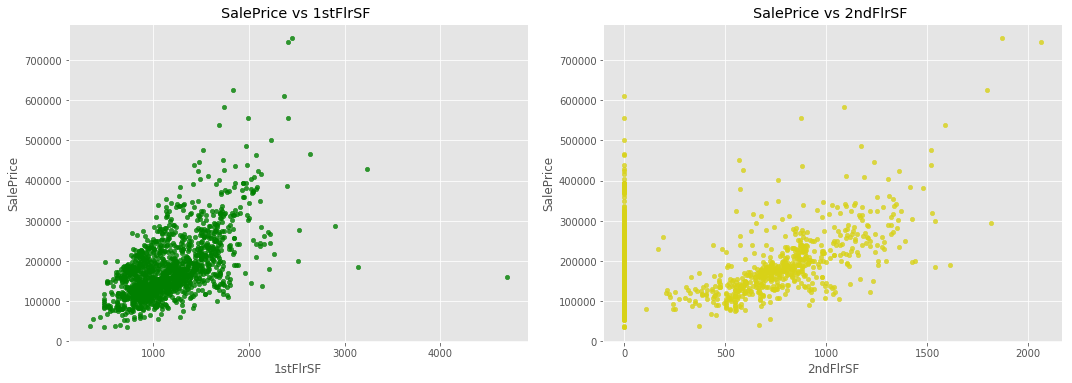

In [38]:

#Relationship between Sale Price and First Floor square feet (1stFlrSF)
plt.subplot(221)
plt.scatter(data['1stFlrSF'], data['SalePrice'], c='green', alpha=0.8, s=20)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('SalePrice vs 1stFlrSF ')


# Relationship between Sale Price and Second Floor square feet (2ndFlrSF)
plt.subplot(222)
plt.scatter(data['2ndFlrSF'], data['SalePrice'], c='#D8D217', alpha=0.8, s=20)
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')
plt.title('SalePrice vs 2ndFlrSF ')

plt.tight_layout()
plt.show()

### Observations
From the scatter plots above, they both show a linear relationship with sale price.   
Furthermore, the first scatter plot displays an outliar which is of great importance as it is out of the trend. Since the floor square feet is too large and not what most clients like, it ended up being sold in a lower price.   
This could therefore act as a great peice of information as the vendors will know a better way of meeting to the clients demand by which is by maintaining houses within the range 1000 and 2000 squre feets.  
Also, on the second scatter plot, there is a straight line showing a portion of clients who go in for single flat houses. To therefore meet to the needs of all, a portion of houses will therefore be single flats while others will be double depending on the ratio of these two groups of buyers.

In [39]:
# Below is a list of all these features with categorical data:
# - MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, condition2, BldgType
# HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation,
# BsmtQual, BsmtCond,BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional,  
# FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition
# 
# Converting all of the categorical features to numerical data.
data = pd.get_dummies(data) 
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


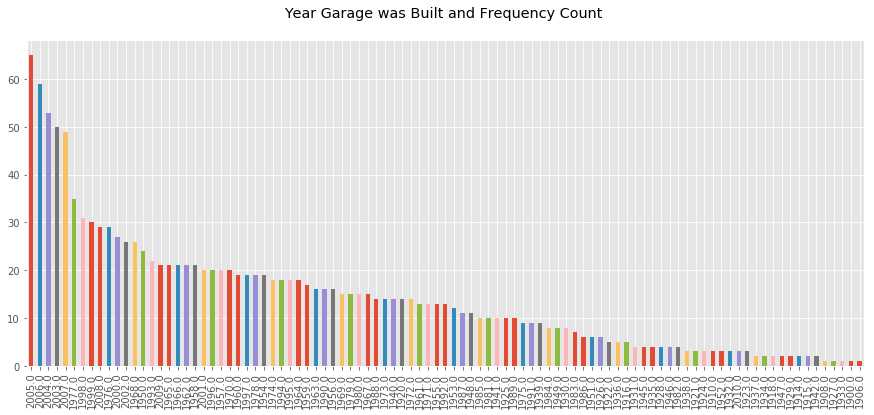

In [40]:
# Taking care of more null values not noticed above.
# Since there are null values in the GarageYrBuilt, a bar graph with counts of the most common year will be used to replace the null values.
plt.rcParams["figure.figsize"] = (15,6)
data['GarageYrBlt'].value_counts().plot('bar')
plt.title('Year Garage was Built and Frequency Count \n')

# Since 2005 is the most common, null values will therefore be replaced with this value.
data["GarageYrBlt"].fillna(2005, inplace = True)

In [41]:
# Taking care of null values nuder the MasVnrArea
# since its area of masonry, the null values will be replaced with the mean value of this feature.

data['MasVnrArea'] = data['MasVnrArea'].fillna((data['MasVnrArea'].mean()))

In [42]:
# To be sure there is no more null value

data.isnull().any().any()


False

In [43]:
#data_2 will be used when considering the sub set of the data. 
data_1 = data

In [21]:
#split the data into train and test set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Extract y which will be used later when testing the model.
y = data.iloc[:, 37].values

# Dataset without y. The categorical variable
data.drop(data.columns[38], axis=1, inplace=True)

X = data.iloc[:, ].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [22]:
#Fitting the training set on the linear Regression
from sklearn.linear_model import LinearRegression

print("X: ", type(X), X.shape)
print('y: ', type(y), y.shape)
print("\n")

#Predicting the train results
clf=LinearRegression()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_train)

#Accuracy from the training data
print("[Train] Accuracy score (y_train, y_predict):", accuracy_score(y_train, y_predict.round()))
print("\n")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_predict.round())
print("Confusion Matrix \n", cm)



X:  <class 'numpy.ndarray'> (1460, 289)
y:  <class 'numpy.ndarray'> (1460,)


[Train] Accuracy score (y_train, y_predict): 1.0


Confusion Matrix 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [23]:
#Predicting the train results

y_predtest = clf.predict(X_test)

#Accuracy from the testing the model
print("[Test] Accuracy score (y_test, y_predict test):", accuracy_score(y_test, y_predtest.round()))

[Test] Accuracy score (y_test, y_predict test): 1.0


### Linear Regression Model Performance
After data cleaning and exploratory data analysis, Linear regression turned to be the best fit for the data since the target feature is a continous variable and also has a linear relationship with some of the features of high significance.  
Training and testing this model on the data overfits.  
Overfitting occurs when the model fits the data too well therefore no errors are observed. This model therefore overfits since the test accuracy score is 100%.

In [44]:
# Considering 100 random samples of the data. Train and test to see if the model performs better without overfitting.
sub_data = data_1.sample(n=100)

In [45]:
# Extract y which will be used later in when testing the model.
y_2 = sub_data.iloc[:, 37].values

# Dataset without y. The categorical variables will now be converted to numerical.
sub_data.drop(sub_data.columns[38], axis=1, inplace=True)

X_2 = sub_data.iloc[:, ].values
X_tr, X_tst, y_tr, y_tst = train_test_split(X_2, y_2, test_size = 0.25, random_state = 10)


In [46]:
#Fitting the training set on the linear Regression

print("X: ", type(X_2), X_2.shape)
print('y: ', type(y_2), y_2.shape)
print("\n")


#Predicting the train results
clf_2 = LinearRegression()
clf_2.fit(X_tr, y_tr)

y_pred = clf_2.predict(X_tr)

#Accuracy from the training data
print("[Train] Accuracy score (y_train, y_predict):", accuracy_score(y_tr, y_pred.round()))
print("\n")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_tr, y_pred.round())
print("Confusion Matrix \n", cm)



X:  <class 'numpy.ndarray'> (100, 289)
y:  <class 'numpy.ndarray'> (100,)


[Train] Accuracy score (y_train, y_predict): 1.0


Confusion Matrix 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [47]:
y_predtst = clf_2.predict(X_tst)

#Accuracy from the testing the model
print("[Test] Accuracy score (y_test, y_predict test):", accuracy_score(y_tst, y_predtst.round()))

[Test] Accuracy score (y_test, y_predict test): 1.0


Considering a subset of the data which is 100 random samples, the model still overfitts the data.  
This therefore shows that this chosen model is not a good fit to train this data.

## Task two 
### Primary task
    1.  Why did you use the regression model technique you chose?
    The two main reasons I used a Linear Regression model is firstly because the target feature SalePrice is a continouos variable and secondly because the relation between SalePrice and some features with high significant values like GrLivArea (Above ground living area square feet) and 1stFlrSF (First Floor square feet) both have a linear relationship with the SalePrice variable.
    2. Why did you choose the predictors/covariates/variables you used?
    From the data description, all the features in this dataset have an influence to the target. Some with higher significant values and others with lower significant values. This therefore made me use all as they all have an influence to SalePrice.
    3. How well does your model perform? Please explain your reasoning and include work regarding model validation.
    This model is too perfect that it results to a model with zero errors i.e accuracy score is 1 in both the train and test set.
    4. Do you believe the model overfits or underfits the data?
    This model oveerfits the data. Overfitting occurs when the model fits the data too well therefore no errors are observed.
    5. Is there a subset of the data that the model performs better on?
    Considering 100 samples of the data, training this sample using the same linear regression model produces same results.
The training and test accuracy results are still 100% accurate meaning the model still overfits even with a reduced sample of data.